In [ ]:
### 1. Mount Google Drive ###

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
### 2. Prepare data ###

!scp '/content/gdrive/My Drive/comvis/data.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
 extracting: /content/test/images/cardboard396_jpg.rf.fb76c5a28057d42886c70e836a5f8660.jpg  
 extracting: /content/test/images/cardboard63_jpg.rf.e8b066437731ba0197b4e8f530317adc.jpg  
 extracting: /content/test/images/cardboard69_jpg.rf.96a2bd9230ba1716c37862930228599c.jpg  
 extracting: /content/test/images/cardboard70_jpg.rf.6658d17c9c675b230ff683f5b1cf0945.jpg  
 extracting: /content/test/images/cardboard73_jpg.rf.7ae241d5654fca1be25ac162c906938a.jpg  
 extracting: /content/test/images/cardboard76_jpg.rf.78841b2438fb79f249e2a464c8587f24.jpg  
 extracting: /content/test/images/glass122_jpg.rf.986be5d9502e97bae857145c3b5172da.jpg  
 extracting: /content/test/images/glass126_jpg.rf.e126b28c100c96edbca2a0dd4b74be48.jpg  
 extracting: /content/test/images/glass128_jpg.rf.f62b1f31ec68d208517ef0fc3d211502.jpg  
 extracting: /content/test/images/glass133_jpg.rf.98c46a035ee9dbe3ef2e11f55370acf6.jpg  
 extracting: /content/test/images/glass1

In [9]:
### 3. Install packages ###

!git clone https://github.com/THU-MIG/yolov10.git
!cd yolov10 && pip install .

Cloning into 'yolov10'...
remote: Enumerating objects: 20332, done.
remote: Counting objects: 100% (2445/2445), done.
remote: Compressing objects: 100% (249/249), done.
remote: Total 20332 (delta 2317), reused 2196 (delta 2196), pack-reused 17887 (from 2)
Receiving objects: 100% (20332/20332), 11.14 MiB | 16.26 MiB/s, done.
Resolving deltas: 100% (14337/14337), done.
Processing /content/yolov10
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=731421 sha256=dc800c1db02048f4744533cf0964cc30a56bbeccf5b401f082aecb437d9d6a54
  Stored in directory: /tmp/pip-ephem-wheel-cache-dkegevp5/wheels/51/93/e8/22d2e815ced343915c15d86b2a00d95eb0a997d012527fbea7
Successfully built ultralytics


In [10]:
!pip install albumentations==1.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.6/123.6 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.20
    Uninstalling albumentations-1.4.20:
      Successfully uninstalled albumentations-1.4.20


In [ ]:
### 4. Train model ###

import os

from ultralytics import YOLO


config_path = '/content/data.yaml'

# # Load a model
model = YOLO("yolov10m.pt")  # load pre trained model

# Use the model
model.train(data=config_path, epochs=30, batch=16)  # train the model


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")


New https://pypi.org/project/ultralytics/8.3.51 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov10m.pt, data=/content/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

100%|██████████| 755k/755k [00:00<00:00, 155MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytics

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 210MB/s]
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt =

AMP: checks passed ✅


/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py:276: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/train/labels... 1762 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1762/1762 [00:01<00:00, 1322.88it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 503 images, 0 backgrounds, 0 corrupt: 100%|██████████| 503/503 [00:01<00:00, 400.40it/s]


val: New cache created: /content/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/30      9.14G     0.5312      1.867      1.113      0.559      3.874      1.135          6        640: 100%|██████████| 111/111 [01:15<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16<00:00,  1.01s/it]

                   all        503        506       0.36      0.204     0.0886     0.0505



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/30      9.34G     0.6571      1.532       1.17     0.7618      1.832      1.214          4        640: 100%|██████████| 111/111 [01:12<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506       0.14      0.244     0.0834     0.0437



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/30      9.36G     0.6905      1.536      1.207     0.8015      1.752      1.255          5        640: 100%|██████████| 111/111 [01:13<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        503        506      0.274      0.392      0.254      0.192



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/30      9.33G     0.6411      1.493      1.157     0.7508      1.648      1.206          7        640: 100%|██████████| 111/111 [01:12<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.07it/s]

                   all        503        506      0.256      0.484      0.318       0.23



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/30      9.35G     0.5911      1.422      1.137     0.6949      1.558      1.179          4        640: 100%|██████████| 111/111 [01:12<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.344      0.398      0.256      0.205



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/30      9.33G     0.5614      1.355      1.117     0.6577      1.497      1.156          8        640: 100%|██████████| 111/111 [01:11<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.543      0.466      0.406      0.322



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/30      9.34G     0.5236      1.253      1.081     0.6158      1.376      1.116          5        640: 100%|██████████| 111/111 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        503        506      0.243      0.363      0.233       0.19



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/30      9.33G     0.5112      1.244      1.081     0.6014      1.365      1.111          6        640: 100%|██████████| 111/111 [01:11<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.371      0.474      0.362      0.284



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/30      9.35G     0.5022      1.217      1.078     0.5887      1.324      1.108          3        640: 100%|██████████| 111/111 [01:11<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.07it/s]

                   all        503        506      0.387      0.444      0.336      0.296



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/30      9.33G     0.4721      1.141      1.051      0.545      1.245      1.075          6        640: 100%|██████████| 111/111 [01:12<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.396      0.568      0.486      0.432



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/30      9.34G     0.4538      1.112      1.046     0.5307      1.204      1.076          5        640: 100%|██████████| 111/111 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.427      0.571      0.505      0.464



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/30      9.33G     0.4353      1.112      1.038     0.5107      1.223      1.064          3        640: 100%|██████████| 111/111 [01:12<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        503        506      0.417      0.551      0.491      0.398



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/30      9.36G     0.4192      1.031      1.022     0.4916      1.111      1.044          7        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.07it/s]

                   all        503        506      0.583       0.55      0.605      0.561



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/30      9.34G     0.4142     0.9682      1.024     0.4893      1.049      1.047          7        640: 100%|██████████| 111/111 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.483      0.616      0.595       0.54



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/30      9.34G     0.4161       1.02      1.021     0.4839      1.102      1.046          8        640: 100%|██████████| 111/111 [01:10<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.06it/s]

                   all        503        506      0.547       0.73      0.669       0.62



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/30      9.33G     0.4149      0.983      1.022     0.4786      1.066      1.041          4        640: 100%|██████████| 111/111 [01:11<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.652      0.713      0.726      0.681



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/30      9.36G     0.3847     0.9381      1.002     0.4523      1.002      1.026          8        640: 100%|██████████| 111/111 [01:11<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        503        506      0.518      0.661      0.673      0.631



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/30      9.34G     0.3817     0.9229      1.004     0.4406     0.9982      1.024          7        640: 100%|██████████| 111/111 [01:10<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.668      0.729      0.728      0.695



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/30      9.34G     0.3766     0.8996      0.999     0.4382     0.9809       1.02          4        640: 100%|██████████| 111/111 [01:11<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.656      0.678      0.731      0.669



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/30      9.33G     0.3642     0.8861      0.993     0.4142     0.9529      1.008          8        640: 100%|██████████| 111/111 [01:11<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        503        506      0.652      0.684      0.714      0.686


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      21/30      9.35G       0.31     0.8976     0.9987     0.3608     0.9941      1.036          2        640: 100%|██████████| 111/111 [01:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.598      0.701      0.689       0.66



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      22/30      9.34G     0.2931     0.8463     0.9847      0.339     0.9559       1.02          2        640: 100%|██████████| 111/111 [01:11<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        503        506      0.666      0.722      0.758      0.729



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      23/30      9.34G     0.3241     0.8147      1.033     0.3755       0.88      1.066          2        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.653      0.652      0.724      0.691



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      24/30      9.33G     0.3005     0.8138     0.9922     0.3398     0.8814       1.02          5        640: 100%|██████████| 111/111 [01:10<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.695      0.697      0.765      0.744



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      25/30      9.35G     0.2863     0.7464     0.9823     0.3148     0.8083      1.005          2        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        503        506      0.805      0.738       0.83      0.811



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      26/30      9.33G     0.2829     0.7505     0.9706      0.324     0.8338     0.9965          2        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506       0.82      0.715      0.827      0.812



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      27/30      9.34G     0.2721     0.6827     0.9641     0.3081     0.7557     0.9909          2        640: 100%|██████████| 111/111 [01:09<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.795      0.752      0.822      0.806



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      28/30      9.33G      0.247     0.6355      0.945      0.283     0.6965     0.9661          2        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]

                   all        503        506      0.707      0.777      0.821      0.805



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      29/30      9.35G     0.2472     0.6275     0.9525     0.2843     0.6993     0.9782          2        640: 100%|██████████| 111/111 [01:10<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]

                   all        503        506      0.746      0.808       0.85      0.838



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      30/30      9.33G     0.2377     0.6009     0.9385     0.2711     0.6567     0.9615          1        640: 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.07it/s]

                   all        503        506      0.731      0.831      0.848      0.835



30 epochs completed in 0.761 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 33.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 33.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16457332 parameters, 0 gradients, 63.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15<00:00,  1.04it/s]


                   all        503        506      0.748      0.807       0.85      0.838
                 Metal        503         74      0.861      0.753      0.911        0.9
                 Paper        503        127      0.764      0.913      0.932      0.917
               Plastic        503        102      0.746      0.804      0.869      0.858
          Random Trash        503         26      0.464      0.654      0.571      0.571
             cardboard        503         82      0.904      0.803      0.909      0.906
                 glass        503         95      0.746      0.916      0.905      0.879
Speed: 0.3ms preprocess, 24.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg1,▃▆███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▁▁▃▃▃▄▂▄▃▅▅▅▆▆▆▇▆▇▇▇▇▇▇▇██████
metrics/mAP50-95(B),▁▁▂▃▂▃▂▃▃▄▅▄▆▅▆▇▆▇▇▇▆▇▇▇██████
metrics/precision(B),▃▁▂▂▃▅▂▃▄▄▄▄▆▅▅▆▅▆▆▆▆▆▆▇███▇▇▇
metrics/recall(B),▁▁▃▄▃▄▃▄▄▅▅▅▅▆▇▇▆▇▆▇▇▇▆▇▇▇▇███
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_om,▆▇█▇▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e62d304ceb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
### 5. Download results ###

from google.colab import files


!zip -r /content/runs.zip /content/runs

files.download('/content/runs.zip')


  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/val_batch1_labels.jpg (deflated 16%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 15%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 44%)
  adding: content/runs/detect/train/results.csv (deflated 84%)
  adding: content/runs/detect/train/train_batch2220.jpg (deflated 11%)
  adding: content/runs/detect/train/val_batch2_pred.jpg (deflated 15%)
  adding: content/runs/detect/train/F1_curve.png (deflated 6%)
  adding: content/runs/detect/train/train_batch2221.jpg (deflated 15%)
  adding: content/runs/detect/train/events.out.tfevents.1734512819.19012206ba5c.627.0 (deflated 93%)
  adding: content/runs/detect/train/PR_curve.png (deflated 11%)
  adding: content/runs/detect/train/train_batch1.jpg (deflated 6%)
  adding: content/runs/detect/train/P_curve.png (deflated 7%)
  adding: content/r

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

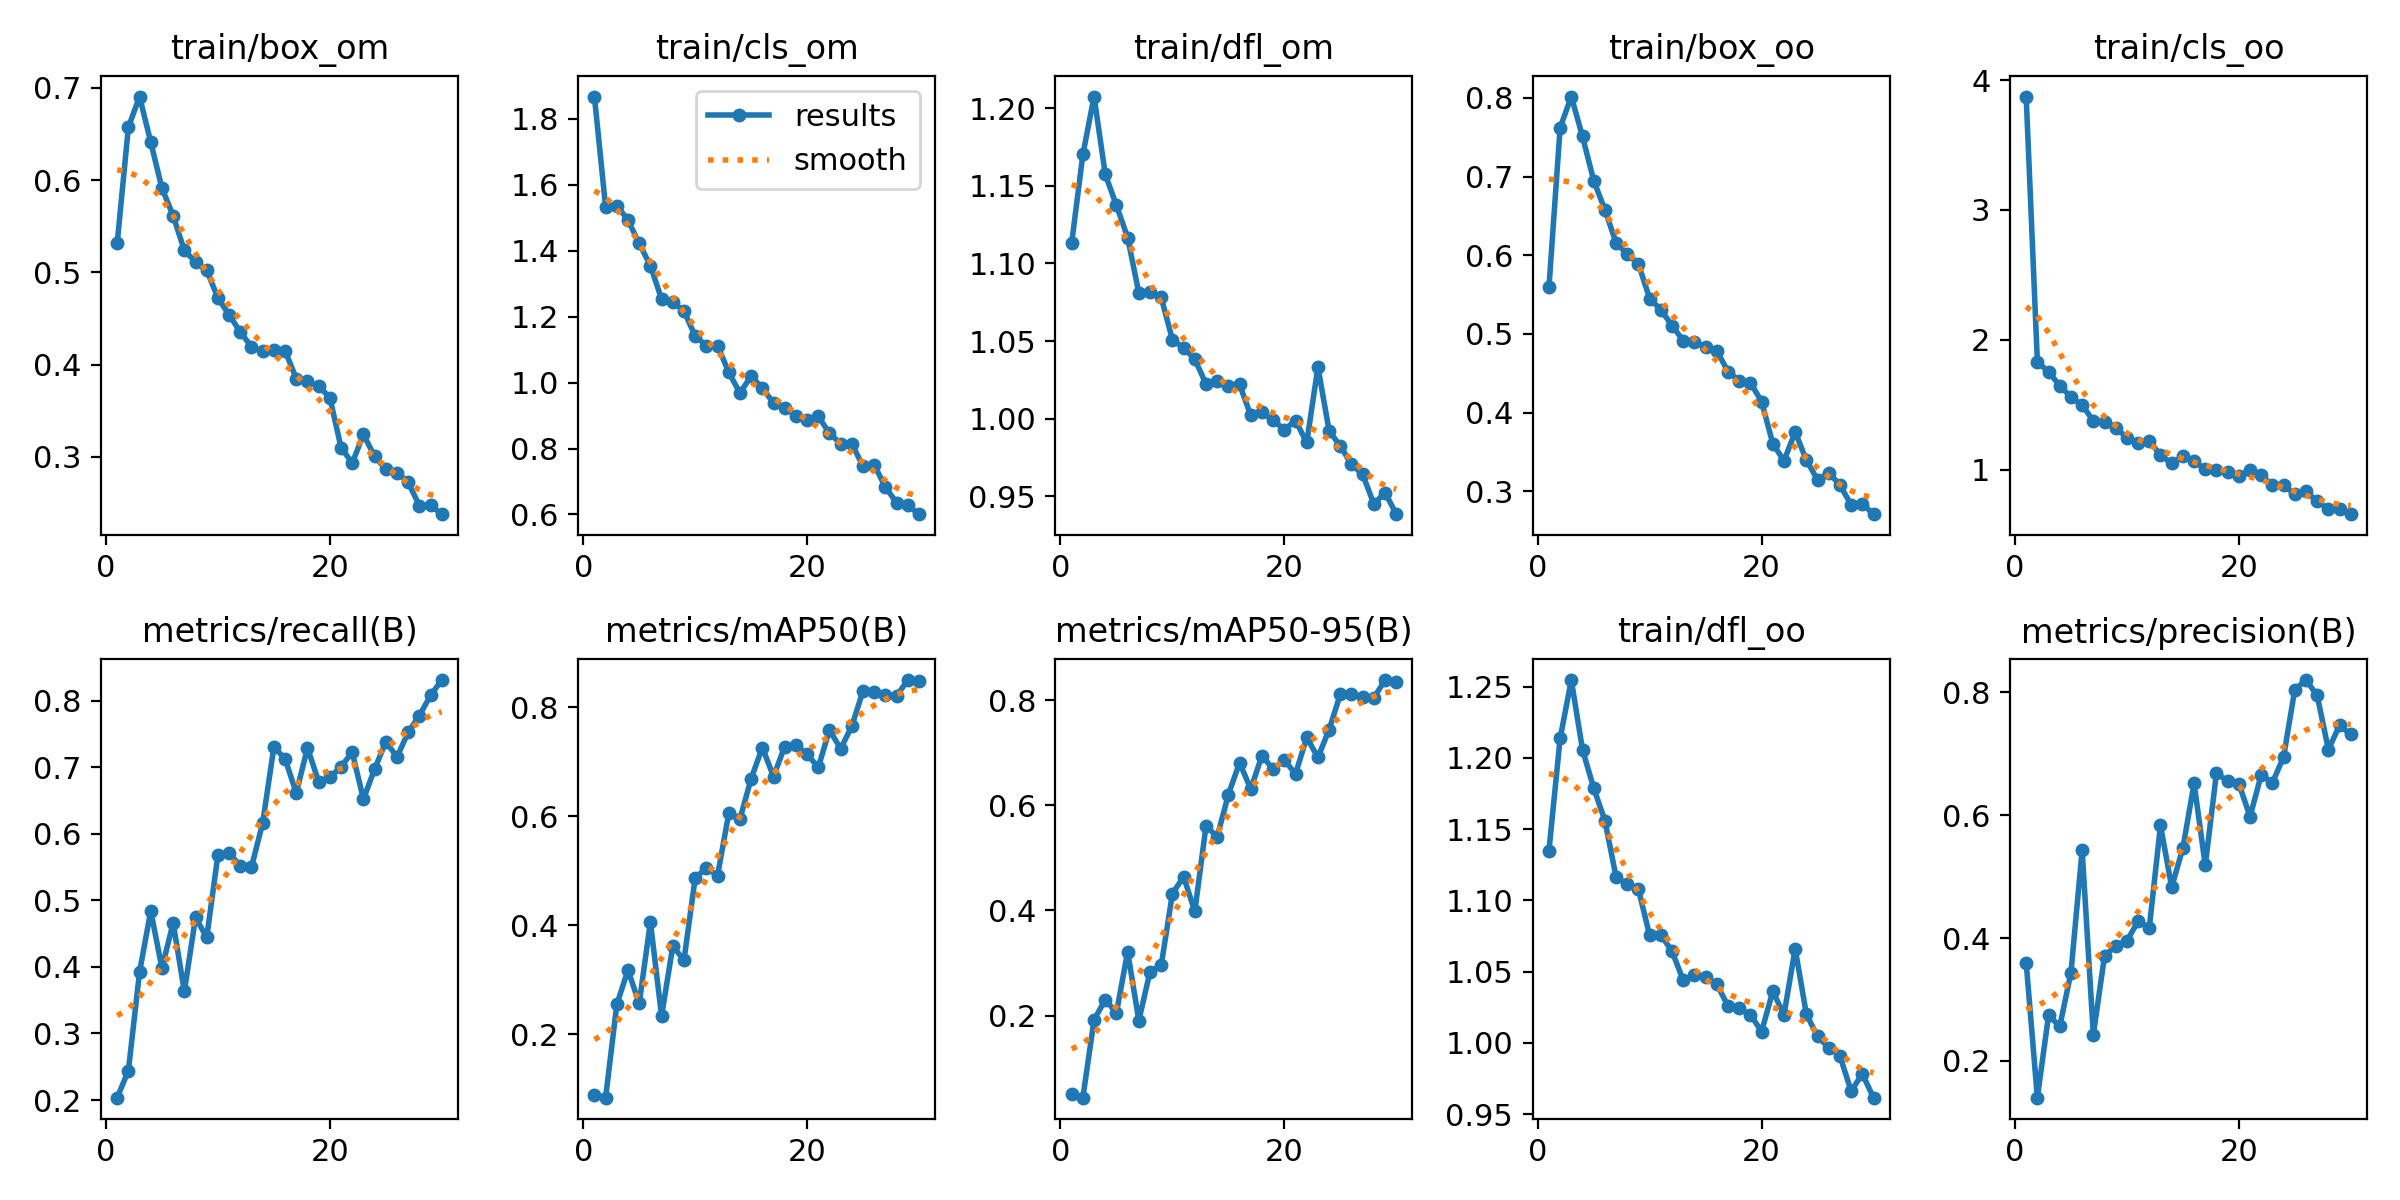

In [ ]:
from IPython.display import Image
Image("/content/content/runs/detect/train/results.png")

Testing Gambar


image 1/1 /content/gambartest.jpg: 640x640 2 glasss, 34.5ms
Speed: 1.6ms preprocess, 34.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


array([[[242, 229, 227],
        [242, 229, 227],
        [242, 229, 227],
        ...,
        [174, 161, 159],
        [174, 161, 159],
        [174, 161, 159]],

       [[242, 229, 227],
        [242, 229, 227],
        [241, 228, 226],
        ...,
        [174, 161, 159],
        [174, 161, 159],
        [174, 161, 159]],

       [[242, 229, 227],
        [241, 228, 226],
        [241, 228, 226],
        ...,
        [174, 161, 159],
        [174, 161, 159],
        [174, 161, 159]],

       ...,

       [[239, 226, 224],
        [239, 226, 224],
        [240, 227, 225],
        ...,
        [175, 163, 163],
        [175, 163, 163],
        [175, 163, 163]],

       [[239, 226, 224],
        [240, 227, 225],
        [240, 227, 225],
        ...,
        [176, 164, 164],
        [175, 163, 163],
        [175, 163, 163]],

       [[239, 226, 224],
        [240, 227, 225],
        [240, 227, 225],
        ...,
        [176, 164, 164],
        [175, 163, 163],
        [175, 163, 163]]], dtype=uint8)
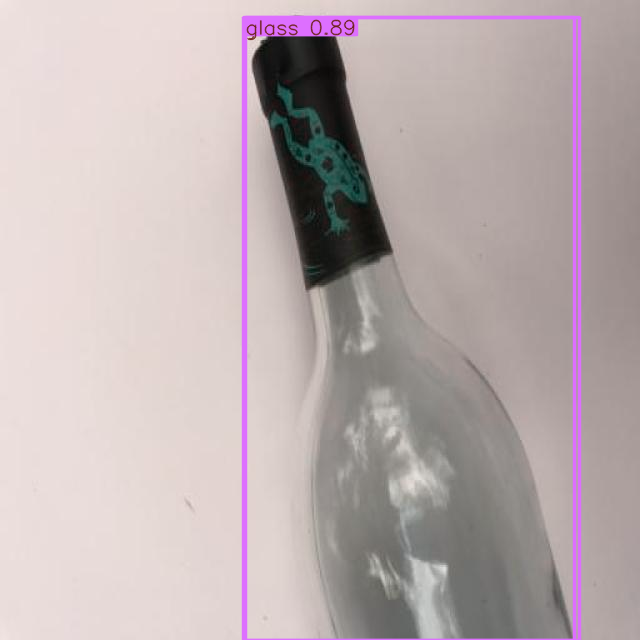

In [2]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest2.jpg: 640x640 1 Plastic, 34.5ms
Speed: 1.4ms preprocess, 34.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


array([[[235, 222, 220],
        [235, 222, 220],
        [235, 222, 220],
        ...,
        [181, 169, 169],
        [181, 169, 169],
        [181, 169, 169]],

       [[235, 222, 220],
        [235, 222, 220],
        [235, 222, 220],
        ...,
        [181, 169, 169],
        [181, 169, 169],
        [181, 169, 169]],

       [[235, 222, 220],
        [235, 222, 220],
        [235, 222, 220],
        ...,
        [181, 169, 169],
        [181, 169, 169],
        [181, 169, 169]],

       ...,

       [[236, 223, 221],
        [235, 222, 220],
        [235, 222, 220],
        ...,
        [188, 178, 178],
        [188, 178, 178],
        [188, 178, 178]],

       [[236, 223, 221],
        [236, 223, 221],
        [235, 222, 220],
        ...,
        [188, 178, 178],
        [188, 178, 178],
        [188, 178, 178]],

       [[236, 223, 221],
        [236, 223, 221],
        [236, 223, 221],
        ...,
        [188, 178, 178],
        [188, 178, 178],
        [188, 178, 178]]], dtype=uint8)
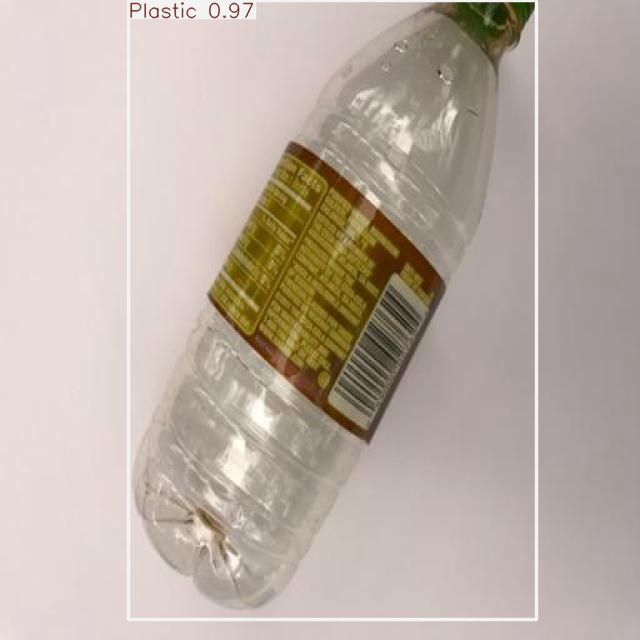

In [3]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest2.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest3.jpg: 640x640 1 Paper, 34.5ms
Speed: 1.8ms preprocess, 34.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


array([[[213, 224, 238],
        [213, 224, 238],
        [213, 224, 238],
        ...,
        [186, 202, 218],
        [186, 202, 218],
        [186, 202, 218]],

       [[213, 224, 238],
        [213, 224, 238],
        [213, 224, 238],
        ...,
        [186, 202, 218],
        [186, 202, 218],
        [186, 202, 218]],

       [[213, 224, 238],
        [213, 224, 238],
        [213, 224, 238],
        ...,
        [186, 202, 218],
        [186, 202, 218],
        [186, 202, 218]],

       ...,

       [[207, 223, 236],
        [207, 223, 236],
        [207, 223, 236],
        ...,
        [191, 203, 215],
        [191, 203, 215],
        [191, 203, 215]],

       [[207, 223, 236],
        [207, 223, 236],
        [207, 223, 236],
        ...,
        [191, 203, 215],
        [191, 203, 215],
        [191, 203, 215]],

       [[207, 223, 236],
        [207, 223, 236],
        [207, 223, 236],
        ...,
        [191, 203, 215],
        [191, 203, 215],
        [191, 203, 215]]], dtype=uint8)
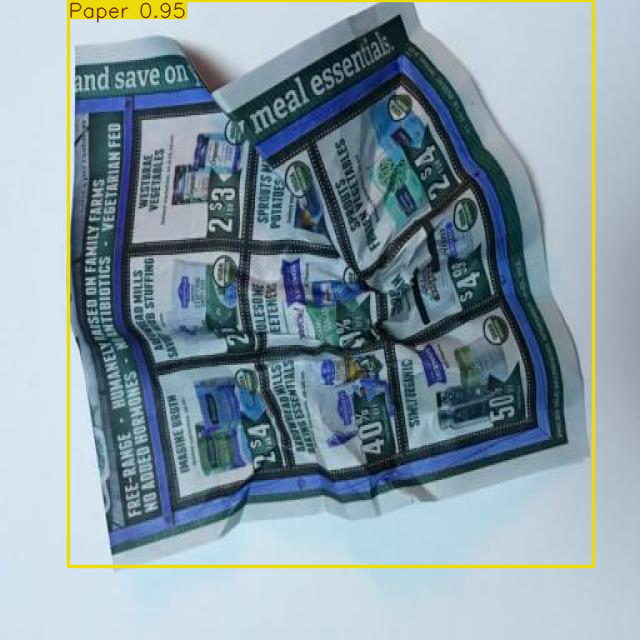

In [4]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest3.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest4.jpg: 640x640 1 cardboard, 34.5ms
Speed: 1.5ms preprocess, 34.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


array([[[229, 227, 226],
        [229, 227, 226],
        [229, 227, 226],
        ...,
        [212, 219, 214],
        [212, 219, 214],
        [212, 219, 214]],

       [[229, 227, 226],
        [229, 227, 226],
        [229, 227, 226],
        ...,
        [212, 219, 214],
        [212, 219, 214],
        [212, 219, 214]],

       [[229, 227, 226],
        [229, 227, 226],
        [230, 228, 227],
        ...,
        [213, 219, 214],
        [213, 219, 214],
        [213, 219, 214]],

       ...,

       [[220, 221, 217],
        [220, 221, 217],
        [220, 221, 217],
        ...,
        [204, 203, 199],
        [204, 203, 199],
        [204, 203, 199]],

       [[220, 221, 217],
        [220, 221, 217],
        [220, 221, 217],
        ...,
        [204, 203, 199],
        [204, 203, 199],
        [204, 203, 199]],

       [[220, 221, 217],
        [220, 221, 217],
        [220, 221, 217],
        ...,
        [204, 203, 199],
        [204, 203, 199],
        [204, 203, 199]]], dtype=uint8)
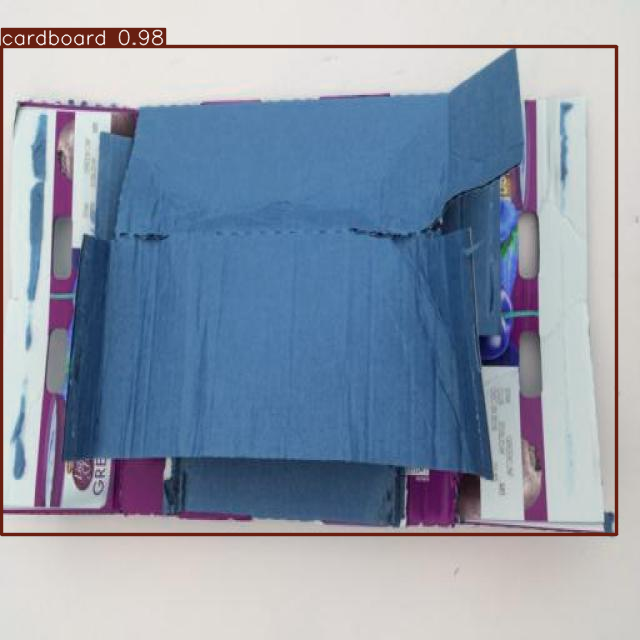

In [12]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest4.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()



image 1/1 /content/gambartest5.jpg: 640x640 1 Metal, 34.5ms
Speed: 1.8ms preprocess, 34.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


array([[[216, 201, 198],
        [216, 201, 198],
        [216, 201, 198],
        ...,
        [182, 169, 167],
        [182, 169, 167],
        [182, 169, 167]],

       [[216, 201, 198],
        [216, 201, 198],
        [216, 201, 198],
        ...,
        [182, 169, 167],
        [182, 169, 167],
        [182, 169, 167]],

       [[216, 201, 198],
        [216, 201, 198],
        [216, 201, 198],
        ...,
        [182, 169, 167],
        [182, 169, 167],
        [182, 169, 167]],

       ...,

       [[222, 205, 202],
        [222, 205, 202],
        [222, 205, 202],
        ...,
        [181, 168, 166],
        [181, 168, 166],
        [181, 168, 166]],

       [[222, 205, 202],
        [222, 205, 202],
        [222, 205, 202],
        ...,
        [181, 168, 166],
        [181, 168, 166],
        [181, 168, 166]],

       [[222, 205, 202],
        [222, 205, 202],
        [222, 205, 202],
        ...,
        [181, 168, 166],
        [181, 168, 166],
        [181, 168, 166]]], dtype=uint8)
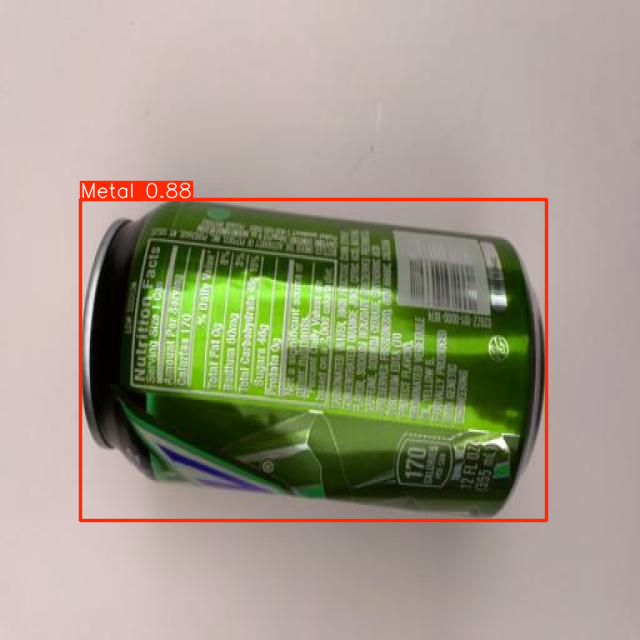

In [6]:
from ultralytics import YOLO
import os

# Load the model
model_path = '/content/content/runs/detect/train/weights/best.pt'
assert os.path.exists(model_path), f"Model file {model_path} tidak ditemukan!"
my_new_model = YOLO(model_path)

# Image path
new_image = '/content/gambartest5.jpg'
assert os.path.exists(new_image), f"File {new_image} tidak ditemukan!"

# Run prediction
new_results = my_new_model.predict(source=new_image, conf=0.1)


# Optional: Visualize predictions
new_results[0].plot()
